In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.8/249.8 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [133]:
data = pd.read_csv('IS4250JanFeb2023.csv')

In [134]:
data = data.rename(columns={'Unnamed: 0': "Date"})
data.index = data['Date']
data = data.drop(columns = 'Date')
print(data.head())
print(data.shape)

                         3-Jan-23  4-Jan-23  5-Jan-23  6-Jan-23  9-Jan-23  \
Date                                                                        
Assessment                      4         4         1         1        16   
Education & Counselling         0         2         2         1         0   
Resources                       0         0         1         2         4   
Referral                        0         1         0         0         0   
Total                           4         7         4         4        20   

                         10-Jan-23  11-Jan-23  12-Jan-23  13-Jan-23  \
Date                                                                  
Assessment                       7          9          1          2   
Education & Counselling          0          1          0          0   
Resources                        0          0          0          0   
Referral                         0          0          0          0   
Total                            7

In [135]:
dataT = data.T
dataT.head()

Date,Assessment,Education & Counselling,Resources,Referral,Total
3-Jan-23,4,0,0,0,4
4-Jan-23,4,2,0,1,7
5-Jan-23,1,2,1,0,4
6-Jan-23,1,1,2,0,4
9-Jan-23,16,0,4,0,20


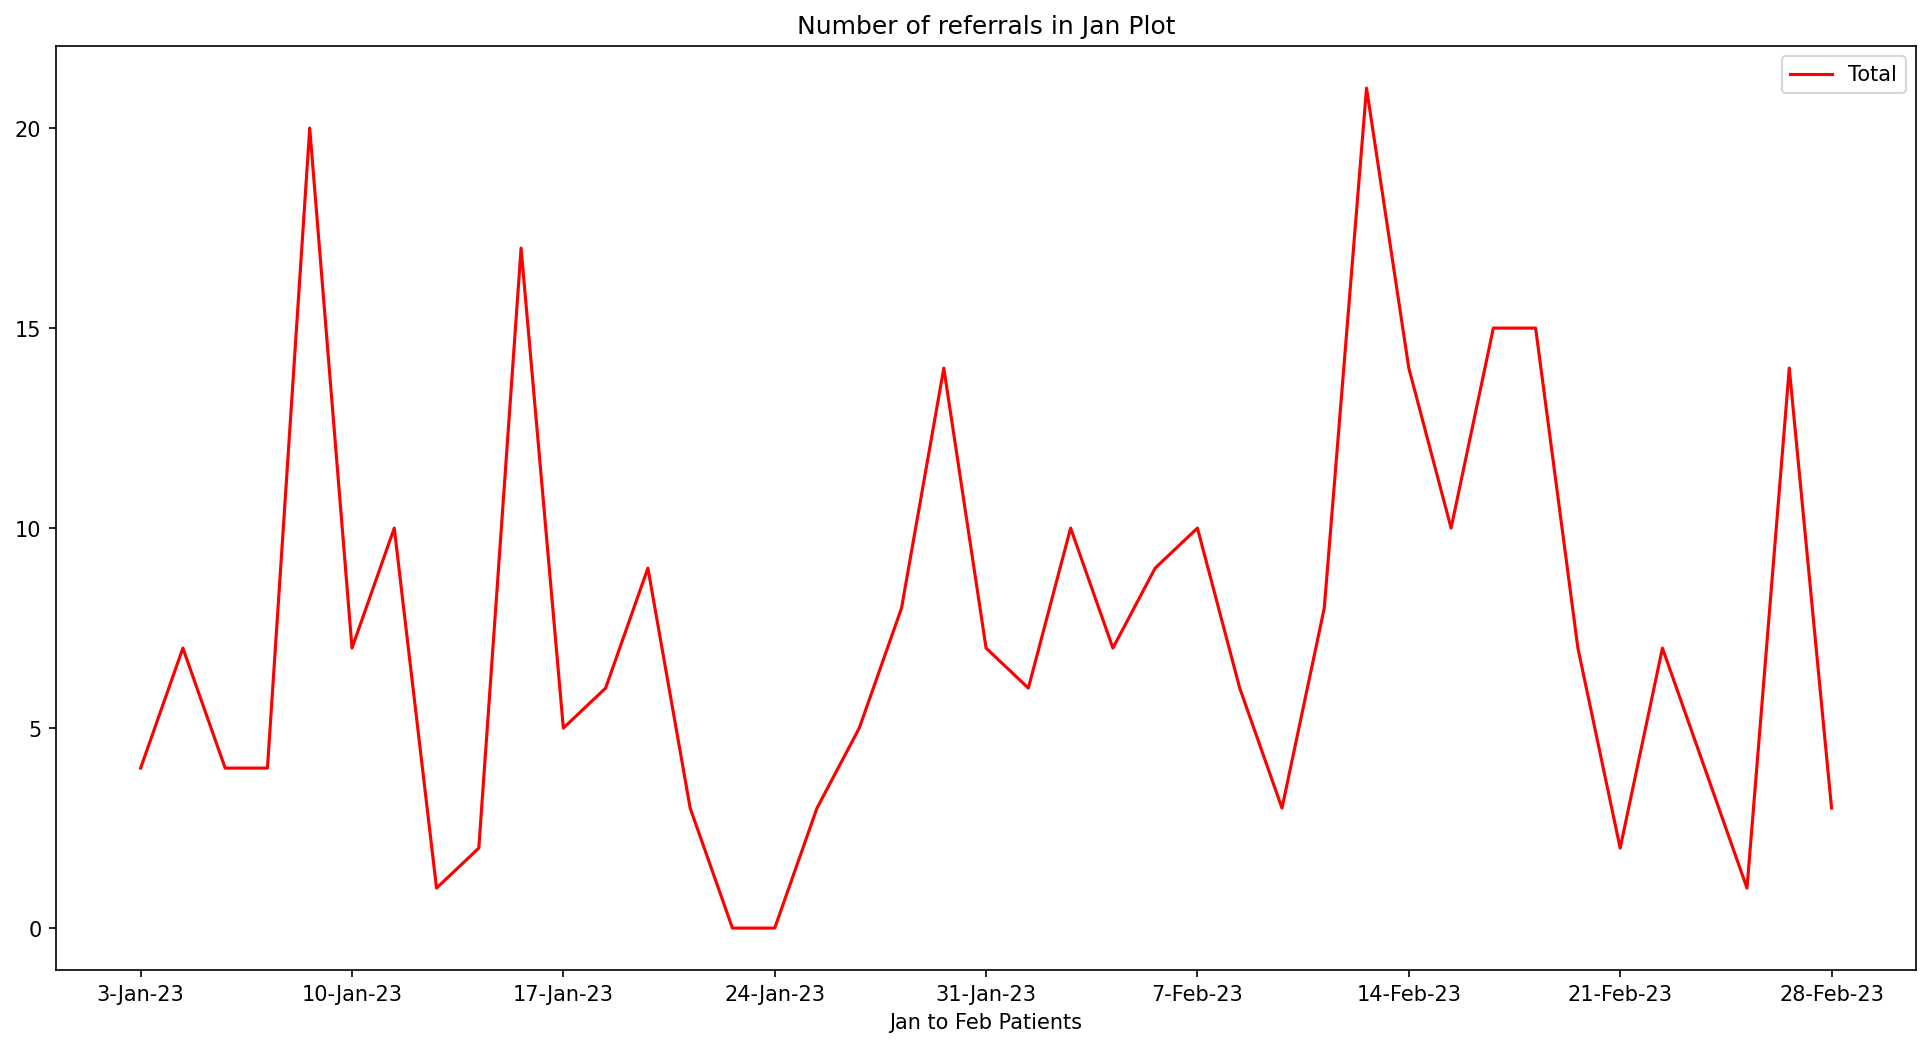

In [136]:
plt.figure(figsize=(16, 8), dpi=150)
dataT['Total'].plot(label='Total', color='red')
plt.title('Number of referrals in Jan Plot')
plt.xlabel('Jan to Feb Patients')
plt.legend()

In [162]:
dataT["Date"] = dataT.index
dataT["Date"] = pd.to_datetime(dataT["Date"])
dataT.index = pd.to_datetime(dataT["Date"])

In [163]:
dataT

Date,Assessment,Education & Counselling,Resources,Referral,Total,Date,forecase
Date,,,,,,,
2023-01-03,4,0,0,0,4,2023-01-03,NaN
2023-01-04,4,2,0,1,7,2023-01-04,NaN
2023-01-05,1,2,1,0,4,2023-01-05,NaN
2023-01-06,1,1,2,0,4,2023-01-06,NaN
2023-01-09,16,0,4,0,20,2023-01-09,NaN
2023-01-10,7,0,0,0,7,2023-01-10,NaN
2023-01-11,9,1,0,0,10,2023-01-11,NaN
2023-01-12,1,0,0,0,1,2023-01-12,NaN
2023-01-13,2,0,0,0,2,2023-01-13,NaN


In [141]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [142]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(dataT.Total, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270.377, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=265.902, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268.377, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=260.879, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=262.806, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=258.881, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=263.904, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=260.808, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best mode

/Users/maximyam/opt/anaconda3/envs/yourenvname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/maximyam/opt/anaconda3/envs/yourenvname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/maximyam/opt/anaconda3/envs/yourenvname/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


2023-02-14    12.0
2023-02-15    12.0
2023-02-16    15.0
2023-02-17    14.0
2023-02-20    13.0
2023-02-21    14.0
2023-02-22    14.0
2023-02-23    14.0
2023-02-24    14.0
2023-02-27    14.0
2023-02-28    14.0
2023-03-01    14.0
2023-03-02    14.0
2023-03-03    14.0
2023-03-06    14.0
2023-03-07    14.0
2023-03-08    14.0
2023-03-09    14.0
2023-03-10    14.0
2023-03-13    14.0
2023-03-14    14.0
Freq: B, Name: predicted_mean, dtype: float64


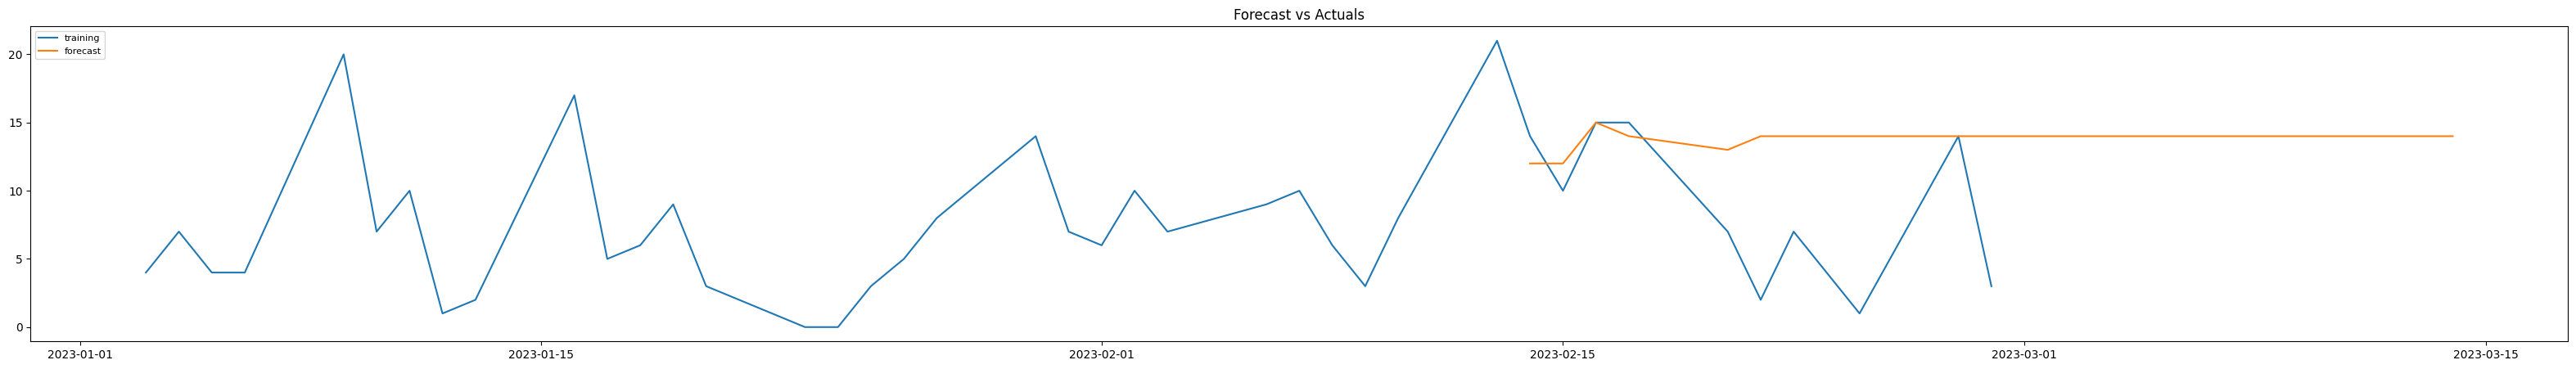

In [178]:
# Looking towards using ARIMA model to predict 
#https://pubmed.ncbi.nlm.nih.gov/34060654/ done in a similar prediction study for predicintg blood drawing in china 

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = dataT.Total[:30]
test = dataT.Total[30:]
#print(test)
# 1,1,2 ARIMA Model
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit()
arr = model_fit.predict( start = 30, end = 50, alpha=0.1, dynamic = True)  # 95% conf
#dataT[['Total','forecast']].plot(figsize=(12,8))
#print(arr)
#print(dataT.Total)
arr = round(arr)
print(arr)

arr.index = pd.to_datetime(arr.index)
plt.figure(figsize=(40,5), dpi=100)
plt.plot(dataT.Total, label='training')
plt.plot(arr, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [179]:
print(arr.index)
arr.index = pd.to_datetime(arr.index)
print(arr.index)


DatetimeIndex(['2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13',
               '2023-03-14'],
              dtype='datetime64[ns]', freq='B')
DatetimeIndex(['2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-13',
               '2023-03-14'],
              dtype='datetime64[ns]', freq='B')


In [184]:
##Estimating time 
newestimates = pd.DataFrame(arr)
newestimates = newestimates.rename(columns={'predicted_mean': "Estimate number of patient"})

#Frome excel data we find that Cogitive test (MMSE) consists of 33.92% of referral 
# and Montreal Cognitive Assessment consists of 32.74% of referrals
# rest is variance
newestimates['Estimated time taken in hours'] = newestimates['Estimate number of patient'] * (0.3392 * 15+ 0.3274 * 20 + 5/3) / 60



In [187]:
#Example of an estimate of 12 patient day
(12/3 * 15 + 12/3 * 20 + 12/3 * 5 )/ 60

2.6666666666666665

In [185]:
newestimates

,Estimate number of patient,Estimated time taken in hours
2023-02-14,12.0,2.660533
2023-02-15,12.0,2.660533
2023-02-16,15.0,3.325667
2023-02-17,14.0,3.103956
2023-02-20,13.0,2.882244
2023-02-21,14.0,3.103956
2023-02-22,14.0,3.103956
2023-02-23,14.0,3.103956
2023-02-24,14.0,3.103956
2023-02-27,14.0,3.103956
